In [101]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import cluster
import matplotlib.pyplot as plt


In [102]:
hcv = pd.read_csv('datasets/hcvdat0.csv')
hcv.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [103]:
hcv["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [104]:
hcv["Sex"].unique()

array(['m', 'f'], dtype=object)

In [105]:
hcv["Category"].replace({"0=Blood Donor": 0, "0s=suspect Blood Donor": 0, "1=Hepatitis": 1, "2=Fibrosis": 2, "3=Cirrhosis": 3}, inplace=True)

In [106]:
hcv["Sex"].replace({"m": 1, "f": 0}, inplace=True)

In [107]:
del hcv['Unnamed: 0']

In [108]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [109]:
clean_dataset(hcv)
hcv

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [110]:
hcv.var()

Category       0.444140
Age           98.631388
Sex            0.236877
ALB           33.198270
ALP          671.901949
ALT          435.269784
AST         1080.231200
BIL          302.988734
CHE            4.800799
CHOL           1.274537
CREA        2570.184928
GGT         2948.751409
PROT          28.610549
dtype: float64

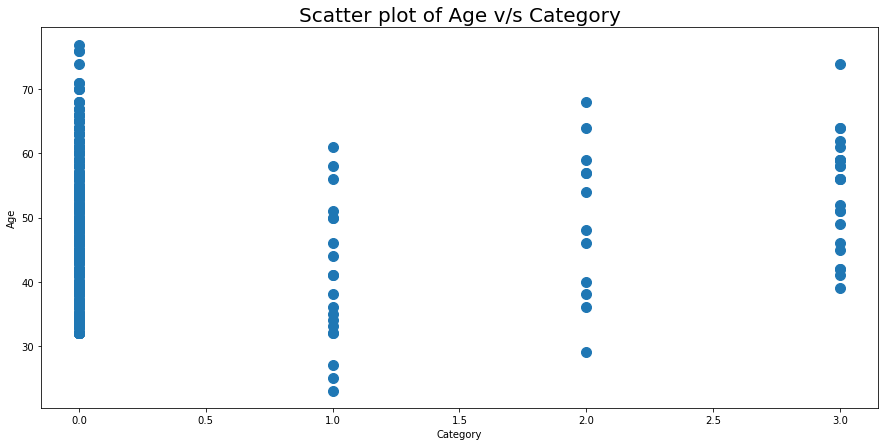

In [111]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Category', fontsize = 20)
plt.xlabel('Category')
plt.ylabel('Age')
plt.scatter( x = 'Category', y = 'Age', data = hcv, s = 100)
plt.show()

In [113]:
hcv.reset_index()


In [114]:
inertias = []
n_clusters = range(1,10)
for n in n_clusters:
    km_model = KMeans(n_clusters = n)
    km_model.fit(X)
    inertias.append(km_model.inertia_)

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


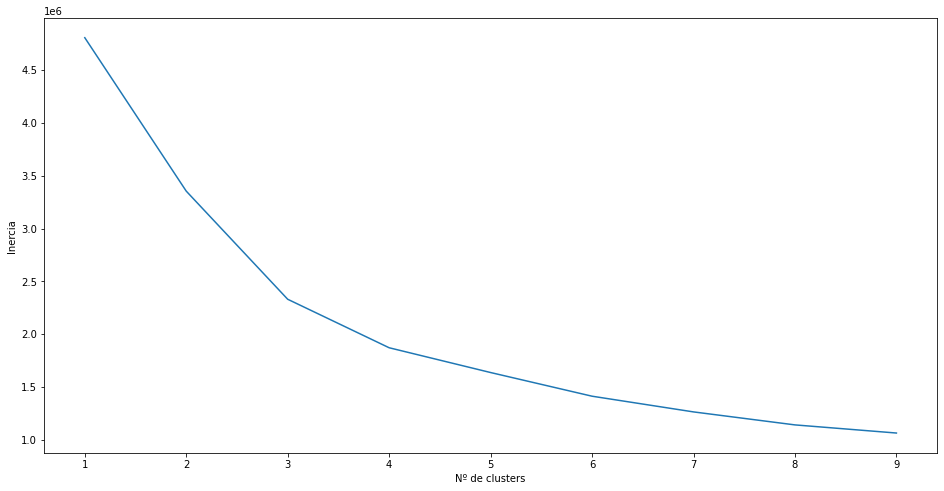

In [115]:
plt.figure(figsize=(16,8))
plt.plot(n_clusters, inertias)
plt.xlabel("Nº de clusters")
plt.ylabel("Inercia")
plt.show()

In [143]:
y = hcv['Category']
X = hcv.to_numpy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [144]:
kmeans.cluster_centers_

array([[5.27306968e-02, 4.70903955e+01, 5.95103578e-01, 4.20645951e+01,
        6.69623352e+01, 2.54384181e+01, 2.66045198e+01, 8.80225989e+00,
        8.36399247e+00, 5.44054614e+00, 7.83192090e+01, 2.67327684e+01,
        7.20094162e+01],
       [1.75000000e+00, 5.65000000e+01, 7.50000000e-01, 3.28500000e+01,
        1.59237500e+02, 6.43250000e+01, 1.50100000e+02, 2.89000000e+01,
        5.01250000e+00, 4.62000000e+00, 8.74625000e+01, 4.06100000e+02,
        6.92500000e+01],
       [1.38297872e+00, 4.97446809e+01, 8.29787234e-01, 3.86297872e+01,
        6.07553191e+01, 3.45148936e+01, 9.51765957e+01, 3.31382979e+01,
        7.08276596e+00, 5.03978723e+00, 7.94021277e+01, 1.00085106e+02,
        7.16425532e+01],
       [3.00000000e+00, 4.46666667e+01, 6.66666667e-01, 3.40000000e+01,
        1.46033333e+02, 2.76666667e+00, 3.03666667e+01, 9.00000000e+00,
        5.89000000e+00, 4.24666667e+00, 6.94666667e+02, 1.17000000e+02,
        6.17000000e+01]])

In [145]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns = ["category", "age", "sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"])
centroides

,category,age,sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.052731,47.090395,0.595104,42.064595,66.962335,25.438418,26.604520,8.802260,8.363992,5.440546,78.319209,26.732768,72.009416
1,1.750000,56.500000,0.750000,32.850000,159.237500,64.325000,150.100000,28.900000,5.012500,4.620000,87.462500,406.100000,69.250000
2,1.382979,49.744681,0.829787,38.629787,60.755319,34.514894,95.176596,33.138298,7.082766,5.039787,79.402128,100.085106,71.642553
3,3.000000,44.666667,0.666667,34.000000,146.033333,2.766667,30.366667,9.000000,5.890000,4.246667,694.666667,117.000000,61.700000


In [146]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

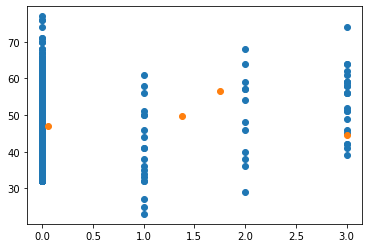

In [147]:
plt.scatter(data.category, data.age)
plt.scatter(centroides.category, centroides.age)

In [148]:
pred = kmeans.predict(X)

pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [149]:
y

0      0
1      0
2      0
3      0
4      0
      ..
608    3
609    3
610    3
611    3
612    3
Name: Category, Length: 589, dtype: int64

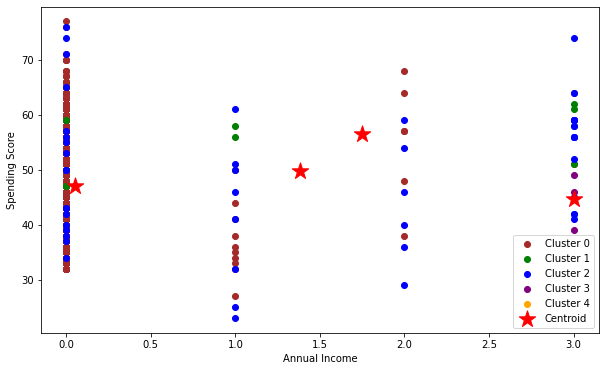

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
